In [66]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
df = pd.read_csv("C:\\Users\\dsadm\\Desktop\\raphael\IABD-1\\formativa\\dados_produtos.csv") #utilizo o pandas para ler o arquivo csv

In [68]:
df.head() #mostra os primeiras linhas do arquivo

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [69]:
df.info() #estou vendo as informaçoes de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [70]:
product_name = df["product_name"]
rating = df["rating"]
rating_count = df["rating_count"]
purchased = df["purchased"]
#estou pegando cada coluna e setando um nome correspondente

c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Notas')

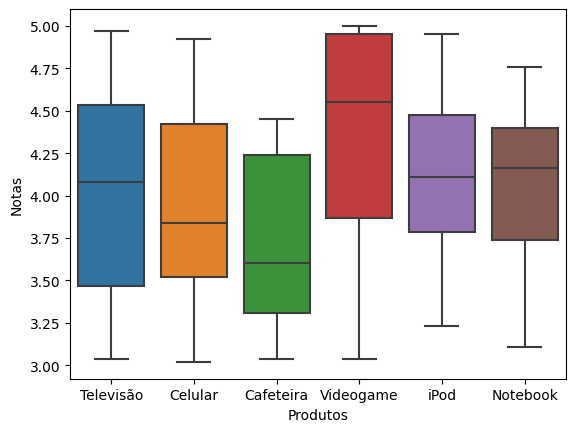

In [71]:
sns.boxplot(x=product_name, y=rating) #plotar a relação dos produtos com suas notas
plt.xlabel('Produtos')
plt.ylabel('Notas')


In [72]:
df.describe() #Mostra estatísticas descritivas

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [73]:
df.dropna(axis=0) #remove dados faltantes

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
...,...,...,...,...
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1


In [82]:
df_televisao = df.loc[df['product_name'] == 'Televisão']
#variáveis explanatórias (independentes)
X = df_televisao.drop(["purchased", "product_name"], axis=1)
#Variavel dependente
y = df_televisao["purchased"] 

In [84]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=10) #divisão em conjunto de treino e teste

In [85]:

modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [87]:
previsoes = modelo.predict(X_teste) #uso o modelo de teste para fazer a previsão
print(previsoes)

[1 0 1 1 0 1]


In [88]:
accuracy = accuracy_score(y_teste,previsoes)
print(accuracy)

0.6666666666666666


KeyError: 0

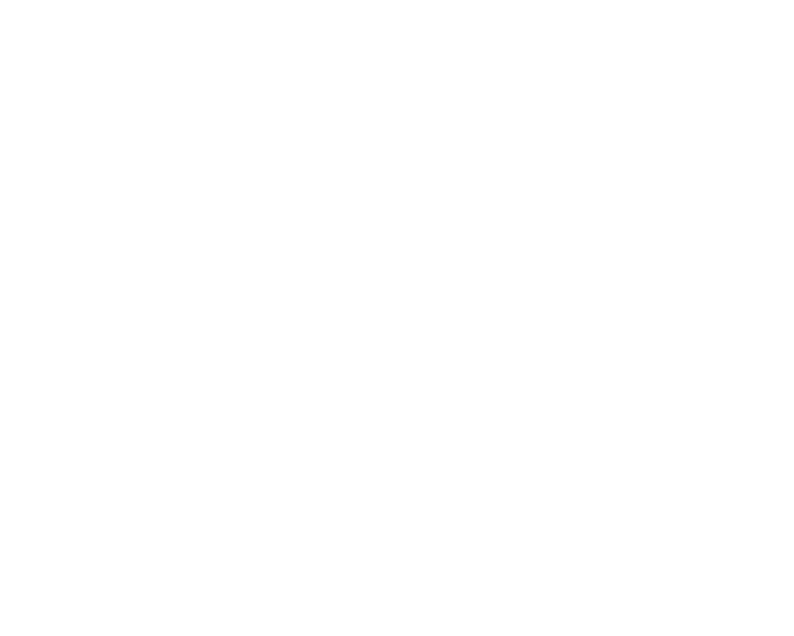

In [90]:
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names= tele, class_names = y, filled= True) #ploto a arvore